In [3]:
# 例6.1
import numpy as np
from sklearn.model_selection import KFold
X = np.arange(60).reshape(30,2)
print('X = \n',X)
kf = KFold(n_splits=10) # 10个一组，一组3个
for train_index in kf.split(X):
    print('X_train:\n%s'%X[train_index])
    print('X_test:\n%s'%X[test_index])
# 每一个训练一次，找精确度最高的，用k

X = 
 [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]
 [40 41]
 [42 43]
 [44 45]
 [46 47]
 [48 49]
 [50 51]
 [52 53]
 [54 55]
 [56 57]
 [58 59]]


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (27,) (3,) 

自助法
有放回的抽样
适合样本多的
（留住法和交叉验证法适合样本少的）

In [4]:
# 随机抽取往里添加
import numpy as np
X = [1, 4, 3, 23, 4, 6, 5, 7, 8, 45, 34, 54, 76, 89, 43, 53] #任意设置一个数据集
bootstrapping = [] # 通过

### 6.1.3 
分类训练给的数据，分类器，被
根据不同的数据集选择不同的分类模型（分类器不同）
模型训练好以后进行评估
若评估性能不太好就调整参数再进行模型训练
利用性能指标，评估分类的好不好成不成功

## 6.2 KNN 分类模型
基于样本数据样本的分类器

### 6.2.1 KNN 算法原理
在训练数据集当中找出K个与待分类的样本距离最近最相似的样本，这个样本大部分属于哪个类别，则该样本也属于哪个类别
（K是几就找几个）

In [5]:
# 例6.4 11个小学毕业生，预测他们未来考上大学的可能性

### 6.2.2 KNN 算法概述
KNN 算法如下：
step1 计算测试数据与各个训练数据之间的距离；
按照个数据之间的递增距离开始排序
选取距离最凶啊的个点
确定签K个点所在类别的数显频率
返回签K个点中出现频率堆高的类别作为测试数据的预测分类
优点：
既可以分类也可以回归
用于数值型和离散性数据
无数据输入假定
对异常值不敏感
缺点：
计算量太大不用，但太少也不能使用，
无法给出数据的内在含义，本身是怎样不知道，只能知道他与其他数据之间的关系

### 6.2.3 Python 实现 KNN 分类算法


#### 1、利用KNN算法实现预测

In [1]:
def knn(trainData, testData, labels, k):#(训练集，测试集，分类，标签)
    rowSize = trainData.shape[0] #计算训练样本的行数
    diff=np.tile(testData,(rowSize,1))-trainData #计算训练样本和测试样本的差值
    sqrDiff = diff ** 2  #计算差值的平方和
    sqrDiffSum = sqrDiff.sum(axis=1)
    distances = sqrDiffSum ** 0.5  #计算距离
    sortDistance = distances.argsort() #对所得的距离从低到高进行排序
    count = {}
    for i in range(k):
        vote = labels[sortDistance[i]]
        count[vote] = count.get(vote, 0) + 1
    sortCount = sorted(count.items(),reverse=True) #对类别出现的频数从高到低进行排序
    return sortCount[0][0] #返回出现频数最高的类别
import numpy as np
trainData = np.array([[100,100,100],[90,98,97],[90,90,85],
[100,90,93],[80,90,70],[100,80,100],[95,95,95],[95,90,80],
[90,75,90],[95,95,90],[100,100,95]])
labels = ['重点院校', '本科院校', '专科院校', '本科院校','专科院校','本科院校','重点院校','专科院校','专科院校','本科院校','重点院校']
testData = [97,96,92]
X = knn(trainData, testData, labels, 3)
print(X)

重点院校


#### 2、2. KNeighborsClassifier()
在scikit-learn 中，与近邻法这一大类相关的类库都在sklearn.neighbors包之中。当使用函数KNeighborsClassifier()进行分类时，需要导入相关的类库，语句为：from sklearn import neighbors。常用形式为：
KNeighborsClassifier(n_neighbors=5,weights=’uniform’)
参数说明：
(1) n_neighbors：KNN中的k值，默认为5。
(2) weights：用于标识最近邻样本的权重，取值为：’uniform’和’distance’。默认’uniform’，表示所有最近邻样本权重都一样；当取值为’distance’时，表示自定义权重。如果样本分布是比较成簇的，取值’uniform’效果较好；如果样本分布比较乱，规律不好寻找时，取值’distance’效果比较好。

E:\admin\Temp/ipykernel_38632/349865988.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
E:\admin\Temp/ipykernel_38632/349865988.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


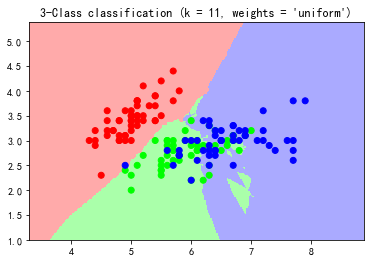

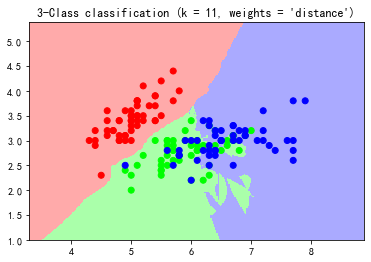

In [3]:
# 例6.6  用KNN对鸢尾花数据集进行分类
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 11 #取k=11
iris = datasets.load_iris()  #导入鸢尾花数据集
x = iris.data[:,:2]  #取前两个feature,方便在二维平面上画图
y = iris.target
h = .02  #网格中的步长
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])# 创建彩色的图
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
for weights in ['uniform', 'distance']: #绘制两种weights参数的KNN效果图  
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)  # 创建了一个knn分类器的实例，并拟合数据
    clf.fit(x, y)
    # 绘制决策边界。为此，将为每个数据对分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]、[y_min, y_max]
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # 绘制训练点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
             % (n_neighbors, weights))
plt.show()

In [7]:
# 程序运行救国出现weights = 'nuiform' 和 weights = 'distance'
# 两张图，其中第一张图如图所示

### 6.2.4 K 值的确定
对KNN 算法的预测结果有至关重要的影响
如果K较小，误差比较小，但算法的故居误差比较大，因为如果近邻点是噪声点的话，预测就会出错；
如果k值较大，距离较远的点也可以对最终预测结果产生影响，但算法的紧邻误差会偏大

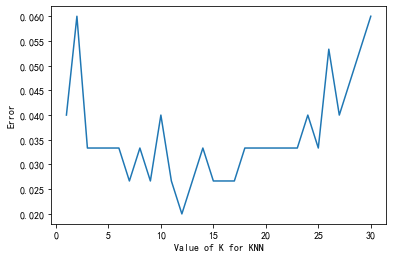

In [4]:
# 例6.7 使用交叉验证法确定 K 值实例
# 把数据集分成 K 份，分成不同的区间，比如8份数据，一份训练集，7分测试集
# 最后准确率对高的就是最终的算法的参数K
from sklearn.datasets import load_iris
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris() #读取鸢尾花数据集
x = iris.data
y = iris.target
k_range = range(1, 31)
k_error = []
for k in k_range: #循环，取K=1到K=31，查看误差效果
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例
    scores = cross_val_score(knn, x, y, cv=6, scoring='accuracy')
    k_error.append(1 - scores.mean())
plt.plot(k_range, k_error) #画图，x轴为k值，y值为误差值
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

## 6.3 Rocchio 分类器模型

新文档和质心的相似度

In [6]:
# 第1步 导入math和numpy库
import math
import numpy as np
# 第2步 文本向量化表示
# 按照文档-特征词统计表将文档以词频的形式表示如下：
data= [[2,0,4,3,0,1,0,2],[0,2,4,0,2,3,0,0],[4,0,1,3,0,1,0,1], [0,1,0,2,0,0,1,0],[0,0,2,0,0,4,0,0],[1,1,0,2,0,1,1,3],[2,1,3,4,0,2,0,2], [3,1,0,4,1,0,2,1,[0,0,3,0,1,5,0,1]]
train_set=data[0:7]  #训练集
test_set=data[7:9]  #测试集
Cat1=[data[0],data[1],data[4]]
Cat2=[data[2],data[3],data[5],data[6]]
# 第3步 计算训练集的文档频率df
def word_fr(train_set1):
    df1=[] #文档频率df
    for j in range(8):
      sum=0
      for i in range(len(train_set1)):
        if train_set1[i][j]!=0:
            sum+=1
      df1.append(sum)
    return df1
df=word_fr(train_set)
# 结果为：[4, 4, 5, 5, 1, 6, 2, 4]
# 第4步 利用文档频率（df）得出特征词的idf
# idf=log(N/df) 其中N为文档数。
def get_idf(df1): 
    N=len(Cat1+Cat2)
    M=[]
    for i in range(8):
       M.append(math.log10(N/df[i]))
    return M
# 计算idf：
df=word_fr(train_set)
idf=[]
for i in range(8):
    idf.append(get_idf(data[i]))
# 第5步 文档的词频向量根据公式tf=(1+log(tf))给出
def get_tf(tf1):
    M=[]
    for i in range(8):
        if tf1[i]==0:
            M.append(0)
        else:    
            M.append(1+math.log10(tf1[i]))
    return M
# 第6步 利用tf[:,j]*idf[j]计算每个train_set特征词的idf_tf值
df=word_fr(train_set)
idf=get_idf(df)
tf=[]
for i in range(7):
    tf.append(get_tf(train_set[i]))
idf_tf=[]
tf=np.array(tf)
for j in range(8):
    t=np.array(tf[:,j])
    tt=idf[j]*t
    idf_tf.append(list(tt))
idf_tf=np.array(idf_tf).T #上面得到的idf_tf 矩阵需要转置
idf_tf=list(idf_tf)  #再转换成列表
# 第7步 由类别Cat1和Cat2求出各类别的质心
Cat1=np.array([idf_tf[0],idf_tf[1],idf_tf[4]])
Cat2=np.array([idf_tf[2],idf_tf[3],idf_tf[5],idf_tf[6]])
C1=np.mean(Cat1,axis=0)
C2=np.mean(Cat2,axis=0)
# 第8步 计算测试集test_set上每个特征词的idf_tf值
# 在测试集test_set上重复第6步，可得Doc8和Doc9的idf_tf值。
# 第9步 判断文档Doc8与Doc9的类别
# 分别计算Doc8、Doc9与质心C1、C2的余弦相似度，可以判断出所属的类别。
def v_cos(arr1,arr2):
    sim=np.dot(arr1,arr2)/(np.sqrt(np.dot(arr1,arr1))* np.dot(arr1,arr2))
    return sim

SyntaxError: invalid syntax (Temp/ipykernel_38632/61847050.py, line 7)

### 6.4.4 决策树的应用

In [7]:
# 例6.12 对例6.9中的数据集用Python实现预测。
# 先对表6.4的数据集进行属性标注：年龄：0代表青年，1代表中年，2代表老年；有工作：0代表否，1代表是；有自己的房子：0代表否，1代表是；信贷情况：0代表一般，1代表好，2代表非常好；类别(是否给予贷款)：no代表否，yes代表是。
from math import log
import operator
def createDataSet():   #创建数据集
    dataSet=[[0,0,0, 0,'no'],[0,0,0,1,'no'],[0,1,0,1,'yes'],
               [0,1,1,0,'yes'],[0,0,0,0,'no'],[1,0,0,0,'no'],
               [1,0,0,1,'no'],[1,1,1,1,'yes'],[1,0,1,2,'yes'],
               [1,0,1,2,'yes'],[2,0,1,2,'yes'],[2,0,1,1,'yes'],
               [2,1,0,1,'yes'],[2,1,0,2,'yes'],[2,0,0,0,'no']] 
    labels = ['年龄','工作','房子','信贷'] #分类属性
    return dataSet, labels #返回数据集和分类属性
def calcShannonEnt(dataSet): #计算给定数据集的熵(香农熵)
    numEntires = len(dataSet)#返回数据集的行数
    labelCounts = {} #保存每个标签(Label)出现次数的字典
    for featVec in dataSet: #对每组特征向量进行统计
        currentLabel = featVec[-1] #提取标签(Label)信息
        if currentLabel not in labelCounts.keys(): 
            #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1 #Label计数
    shannonEnt = 0.0 #经验熵(香农熵)
    for key in labelCounts:#计算香农熵
        prob = float(labelCounts[key]) / numEntires  
        shannonEnt -= prob * log(prob, 2) #利用公式计标签概率
    return shannonEnt #返回熵(香农熵)
def splitDataSet(dataSet, axis, value): #按照给定特征划分数据集
    retDataSet = [] #创建返回的数据集列表
    for featVec in dataSet: #遍历数据集
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])
            #将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet   #返回划分后的数据集
def chooseBestFeatureToSplit(dataSet): #选择最优特征
    numFeatures = len(dataSet[0]) - 1 #特征数量
    baseEntropy = calcShannonEnt(dataSet)#计算数据集的香农熵
    bestInfoGain = 0.0  #信息增益
    bestFeature = -1  #最优特征的索引值
    for i in range(numFeatures): #遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList) #创建set集合{},元素不可重复
        newEntropy = 0.0  #经验条件熵
        for value in uniqueVals: #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value) 
            #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))#计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)
        #根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy  #信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        #打印每个特征的信息增益
        if (infoGain > bestInfoGain): #计算信息增益
            bestInfoGain = infoGain #更新信息增益，找到最大的信息增益
            bestFeature = i #记录信息增益最大的特征的索引值
    return bestFeature  #返回信息增益最大的特征的索引值
def majorityCnt(classList): #统计classList中出现最多的元素(类标签)
    classCount = {}
    for vote in classList: #统计classList中每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator. itemgetter(1), reverse = True)  #根据字典的值降序排序
    return sortedClassCount[0][0] #返回classList中出现次数最多的元素
def createTree(dataSet, labels, featLabels): #递归构建决策树
    classList = [example[-1] for example in dataSet] 
     #取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):   
        #如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1: #遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet) #选择最优特征
    bestFeatLabel = labels[bestFeat] #最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel:{}} #根据最优特征的标签生成树
    del(labels[bestFeat])  #删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet] 
     #得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)#去掉重复的属性值
    for value in uniqueVals:
        subLabels=labels[:]
        #递归调用函数createTree(),遍历特征，创建决策树。
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
    return myTree
def classify(inputTree, featLabels, testVec): #使用决策树执行分类
    firstStr = next(iter(inputTree)) #获取决策树节点
    secondDict = inputTree[firstStr] #下一个字典
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
if __name__ == '__main__':
    dataSet, labels = createDataSet()
    featLabels = []
    myTree = createTree(dataSet, labels, featLabels)
    print('生成的决策树为：\n',myTree)
    print('如果一个中年人，没有工作，但有自己的房子，信贷信誉好，预测是否可以放贷：')
    testVec = [1,0,1,1] # 测试数据
    result = classify(myTree, featLabels, testVec)
    if result == 'yes':
        print('这种情况可以放贷')
    if result == 'no':
        print('这种情况不可以放贷')

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
生成的决策树为：
 {'房子': {0: {'工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}
如果一个中年人，没有工作，但有自己的房子，信贷信誉好，预测是否可以放贷：
这种情况可以放贷


In [1]:
# 例6.13 训练集与测试集如表6.5和表6.6所示。编程序给出决策树的图形表示。
from math import log
import operator
import treePlotter
def calcShannonEnt(dataSet): #计算给定数据集的香农熵
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt
def splitDataSet(dataSet, axis, value): #按照给定特征划分数据集
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet
def chooseBestFeatureToSplit(dataSet): #选择最好的数据集划分维度
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGainRatio = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        splitInfo = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            splitInfo += -prob * log(prob, 2)
        infoGain = baseEntropy - newEntropy
        if (splitInfo == 0): 
            continue
        infoGainRatio = infoGain / splitInfo
        if (infoGainRatio > bestInfoGainRatio):
            bestInfoGainRatio = infoGainRatio
            bestFeature = i
    return bestFeature
def majorityCnt(classList): #采用多数判决的方法决定该子节点的分类
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reversed=True)
    return sortedClassCount[0][0]
def createTree(dataSet, labels): #递归构建决策树
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        # 类别完全相同，停止划分
        return classList[0]
    if len(dataSet[0]) == 1:
        # 遍历完所有特征时返回出现次数最多的
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    # 得到列表包括节点所有的属性值
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree
def classify(inputTree, featLabels, testVec): #输出结果
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
def classifyAll(inputTree, featLabels, testDataSet): #输出结果
    classLabelAll = []
    for testVec in testDataSet:
        classLabelAll.append(classify(inputTree, featLabels, testVec))
    return classLabelAll
def storeTree(inputTree, filename): #保存决策树到文件
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
def grabTree(filename): #从文件读取决策树
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)
def createDataSet(): #创建数据集
    dataSet = [[0, 0, 0, 0, 'N'],[0, 0, 0, 1, 'N'], 
               [1, 0, 0, 0, 'Y'],[2, 1, 0, 0, 'Y'], 
               [2, 2, 1, 0, 'Y'],[2, 2, 1, 1, 'N'], 
               [1, 2, 1, 1, 'Y']]
    labels = ['outlook', 'temperature', 'humidity', 'windy']
    return dataSet, labels
def createTestSet(): #创建测试集
    testSet = [[0,1,0,0],[0,2,1,0],[2,1,1,0],[0,1,1,1], 
               [1,1,0,1],[1,0,1,0],[2,1,0,1]]
    return testSet
def main():
    dataSet, labels = createDataSet()
    labels_tmp = labels[:] # 拷贝，createTree会改变labels
    desicionTree = createTree(dataSet, labels_tmp)
    print('desicionTree:\n', desicionTree)
    treePlotter.createPlot(desicionTree)
    testSet = createTestSet()
    print('classifyResult:\n', classifyAll(desicionTree, labels, testSet))
if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'treePlotter'

In [10]:
# 预测模型，深度学习

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


yy= [1.48653845 1.57131082 1.65608319 1.74085556 1.82562793 1.9104003
 1.99517267 2.07994504 2.16471741 2.24948978 2.33426215 2.41903452
 2.50380689 2.58857926 2.67335163 2.758124   2.84289637 2.92766875
 3.01244112 3.09721349 3.18198586 3.26675823 3.3515306  3.43630297
 3.52107534 3.60584771 3.69062008 3.77539245 3.86016482 3.94493719
 4.02970956 4.11448193 4.1992543  4.28402667 4.36879904 4.45357141
 4.53834378 4.62311615 4.70788853 4.7926609  4.87743327 4.96220564
 5.04697801 5.13175038 5.21652275 5.30129512 5.38606749 5.47083986
 5.55561223 5.6403846 ]
support_vectors_= [[3.4 1.9]
 [2.5 4.5]]


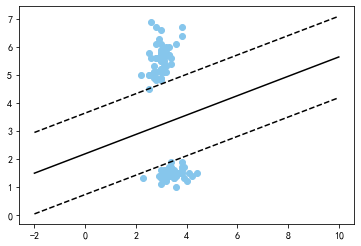

In [1]:
# 例6.17 使用鸢尾花数据集，对其中的两种鸢尾花数据来进行SVM分类。
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm #导入支持向量机
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
tem_X = iris.data[:,1:3]
tem_Y = iris.target
new_data = pd.DataFrame(np.column_stack([tem_X,tem_Y]))
#过滤掉其中一种类型的花
new_data = new_data[new_data[2] != 1.0]
#生成X和Y
X = new_data[[0,1]].values
Y = new_data[[2]].values
# 拟合一个SVM模型
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
# 获取分割超平面
w = clf.coef_[0]
a = -w[0] / w[1]
# 从-5到5，顺序间隔采样50个样本，默认是num=50
xx = np.linspace(-2, 10)  
# 二维的直线方程
yy = a * xx -(clf.intercept_[0])/w[1]
print("yy=", yy)
# 通过支持向量绘制分割超平面
print("support_vectors_=", clf.support_vectors_)
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
# 画线、点和向量
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c='#86c6ec', cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

In [1]:
import xlrd as xd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# matplotlib画图中中文显示会有问题，需要这两行设置默认字体可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------------------------------------------------------------
# # 读取数据
# 打开excel表所在路径

data = xd.open_workbook('Test_Train_Set.xls')
sheet = data.sheet_by_name('Sheet1')
Data_All = []
test_Desired = []
test_Input1 = []
test_Input2 = []
train_Desired = []
train_Input1 = []
train_Input2 = []

# 将表中数据按行逐步添加到列表中，最后转换为list结构
for r in range(sheet.nrows):
    data1 = []
    for c in range(sheet.ncols):
        data1.append(sheet.cell_value(r, c))
    Data_All.append(list(data1))

    test_Desired.append(data1[0])
    test_Input1.append(data1[1])
    test_Input2.append(data1[2])
    train_Desired.append(data1[3])
    train_Input1.append(data1[4])
    train_Input2.append(data1[5])

# 数据筛选，把表头去掉
test_Desired = test_Desired[1:]
test_Input1 = test_Input1[1:]
test_Input2 = test_Input2[1:]
train_Desired = train_Desired[1:]
train_Input1 = train_Input1[1:]
train_Input2 = train_Input2[1:]

# 数据转化为矩阵
test_DesiredM = np.c_[test_Desired[1:]]
test_Input1M = np.c_[test_Input1[1:]]
test_Input2M = np.c_[test_Input2[1:]]
train_DesiredM = np.c_[train_Desired[1:]]
train_Input1M = np.c_[train_Input1[1:]]
train_Input2M = np.c_[train_Input2[1:]]

# -----------------------------------------------------------------------------------
# 定义函数

# Logistic函数: lgstc'(x) = lgstc(x)(1 - lgstc(x))
def lgstc (x):
    return 1 / (1 + math.exp(-x))

# 目标方程：1 + w1x1 + w2x2 = 0

# w0增量
def Del_w0(Input1, Input2, Desired, w0, w1, w2):
    sumDel = 0
    for i in range(len(Input1)):
        lc_p = lgstc(w0 + w1 * Input1[i] + w2 * Input2[i])
        sumDel += Desired[i] - lc_p
    return sumDel

# w1增量
def Del_w1(Input1, Input2, Desired, w0, w1, w2):
    sumDel = 0
    for i in range(len(Input1)):
        lc_p = lgstc(w0 + w1 * Input1[i] + w2 * Input2[i])
        sumDel += Input1[i] * (Desired[i] - lc_p)
    return sumDel

# w2增量
def Del_w2(Input1, Input2, Desired, w0, w1, w2):
    sumDel = 0
    for i in range(len(Input1)):
        lc_p = lgstc(w0 + w1 * Input1[i] + w2 * Input2[i])
        sumDel += Input2[i] * (Desired[i] - lc_p)
    return sumDel

# Loss函数每次迭代后的损失函数
def Loss(Input1, Input2, Desired, w0, w1, w2):
    loss = 0
    for i in range(len(Input1)):
        lc_p = lgstc(w0 + w1 * Input1[i] + w2 * Input2[i])
        loss += Desired[i] * math.log(lc_p) + (1 - Desired[i]) * math.log(1 - lc_p)
    return loss

# 梯度上升法求极值
def GDM_LC(Input1, Input2, Desired, w0 = 0, w1 = 0, w2 = 0, Alpha = 0.1, err = 1e-9):
    w0_list = []
    w1_list = []
    w2_list = []
    loss_list = []
    IterTime = 0

    while 1:
        w0, w1, w2 =\
            w0 + Alpha * Del_w0(Input1, Input2, Desired, w0, w1, w2),  \
            w1 + Alpha * Del_w1(Input1, Input2, Desired, w0, w1, w2),  \
            w2 + Alpha * Del_w2(Input1, Input2, Desired, w0, w1, w2)
        w0_list.append(w0)
        w1_list.append(w1)
        w2_list.append(w2)
        loss_list.append(Loss(Input1, Input2, Desired, w0, w1, w2))
        IterTime = IterTime + 1

        if IterTime > 3:
            if abs(w1_list[IterTime-1] - w1_list[IterTime - 2]) < err:
                if abs(w2_list[IterTime - 1] - w2_list[IterTime - 2]) < err:
                    break

    return w0, w1, w2, w0_list, w1_list, w2_list, loss_list, IterTime

# 正确率验证函数
def bool_rate(Input1, Input2, Desired, w0, w1, w2):

    boolnum = len(Input1)
    boolT = 0

    for i in range(boolnum):
        if Desired[i] == 0:
            if w0 + w1 * Input1[i] + w2 * Input2[i] < 0:
                boolT += 1
        elif Desired[i] == 1:
            if w0 + w1 * Input1[i] + w2 * Input2[i] >= 0:
                boolT += 1

    return boolT / boolnum

# -----------------------------------------------------------------------------------
#
Alpha = 0.1         # 学习参数
err = 1e-9          # 误差

w0, w1, w2, w0_list, w1_list, w2_list, loss_list, IterTime =\
    GDM_LC(test_Input1, test_Input2, test_Desired, 0, 0, 0, Alpha, err)

print('测试集样本数量：'+str(len(test_Desired)))
print('训练集样本数量：'+str(len(train_Desired)))
print('迭代次数为：'+str(IterTime))
print('学习参数为：'+str(Alpha))
print('误差不超过：'+str(err))
str_line = '线性分类的直线为：'+str(round(w0, 3))+'+'+str(round(w1, 3))+'x+'+str(round(w2, 3))+'y=0'
str_test = '训练集的正确率：'+str(round(100 * bool_rate(test_Input1, test_Input2, test_Desired, w0, w1, w2), 3))+'%'
str_train = '测试集的正确率：'+str(round(100 * bool_rate(train_Input1, train_Input2, train_Desired, w0, w1, w2), 3))+'%'
print(str_line)
print(str_test)
print(str_train)

X = test_Input1M
Y = - w0 / w2 - w1 * X / w2

# -----------------------------------------------------------------------------------
# 绘图
plt.figure('线性分类求解（训练集）')
plt.plot(X, Y, label=str_line)
for i in range(len(test_Desired)):
    if test_Desired[i] == 1:
        plt.scatter(test_Input1[i], test_Input2[i], c='r', marker='+')
    else:
        plt.scatter(test_Input1[i], test_Input2[i], c='b', marker='.')
plt.title('训练集样本')
plt.xlabel('训练集坐标x')
plt.ylabel('训练集坐标y')
plt.legend()

plt.figure('线性分类验证（测试集）')
plt.plot(X, Y, label=str_line)
for i in range(len(train_Desired)):
    if train_Desired[i] == 1:
        plt.scatter(train_Input1[i], train_Input2[i], c='r', marker='+')
    else:
        plt.scatter(train_Input1[i], train_Input2[i], c='b', marker='.')
plt.title('测试集样本')
plt.xlabel('测试集坐标x')
plt.ylabel('测试集坐标y')
plt.legend()

plt.figure('指标收敛图像')

plt.subplot(1, 2, 1)
plt.title('概率函数收敛曲线')
plt.semilogx(loss_list, label='指标函数收敛到'+str(round(loss_list[len(loss_list) - 1], 3)))
plt.legend()

plt.subplot(1, 2, 2)
plt.title('直线的三个指标收敛曲线')
plt.semilogx(w0_list, label='w0收敛到'+str(round(w0_list[len(w0_list) - 1], 3)))
plt.semilogx(w1_list, label='w1收敛到'+str(round(w1_list[len(w1_list) - 1], 3)))
plt.semilogx(w2_list, label='w2收敛到'+str(round(w2_list[len(w2_list) - 1], 3)))
plt.legend()

plt.show()

# 概率预测曲面图(三维图)
fig = plt.figure('概率预测曲面图')
ax = fig.add_subplot(111, projection='3d')

x_ax = np.arange(-1, 1, 0.005)
y_ax = np.arange(0, 1, 0.005)
x_ax, y_ax = np.meshgrid(x_ax, y_ax)
z_ax = 1 / (1 + np.exp(- (w0 + w1 * x_ax + w2 * y_ax)))

ax.plot_surface(x_ax, y_ax, z_ax, rstride=1, cstride=1, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('概率预测曲面$z=(1+e^{-8.937+2.590x+20.537y})^{-1}$')

x_line = np.linspace(-1, 1, 10)
y_line = - w0 / w2 - w1 * x_line / w2
z_line = 1 / (1 + np.exp(w0 + w1 * x_line + w2 * y_line))
ax.plot(x_line, y_line, z_line, c='k', label='在曲面上的分类直线：'+str(round(w0, 3))+'+'+str(round(w1, 3))+'x+'+str(round(w2, 3))+'y=0')
ax.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Test_Train_Set.xls'